# I-94 Traffic - Why the volume is so high?
                                                                                                         23rd June 2021

### 1. Introduction

##### This project concerns a dataset about the westbound traffic on the I-94 Interstate highway. The goal of the analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. 

##### The dataset contains hourly (24 hour period) Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. It includes hourly weather features and holidays for impacts on traffic volume. It only includes records for westbound traffic (cars moving from east to west). 

![alt text](i94_figma.png "Title")

##### Attribute Information:

holiday Categorical US National holidays plus regional holiday, Minnesota State Fair

temp Numeric Average temp in kelvin

rain_1h Numeric Amount in mm of rain that occurred in the hour

snow_1h Numeric Amount in mm of snow that occurred in the hour

clouds_all Numeric Percentage of cloud cover

weather_main Categorical Short textual description of the current weather

weather_description Categorical Longer textual description of the current weather

date_time DateTime Hour of the data collected in local CST time

traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume (number of cars)

##### The dataset can be found at: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#

### 2. Explore Dataset

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# read the dataset csv file in pandas

traffic = pd.read_csv(r"C:\Users\faraz\OneDrive\Data_Analytics\DQ Projects\Raw Data\Metro_Interstate_Traffic_Volume.csv")

#show the first and last 5 rows

traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In the next exercise, we're going to plot a histogram to visualize the distribution of the traffic_volume column. Plot a histogram to examine the distribution of the traffic_volume column. Use a Pandas method.

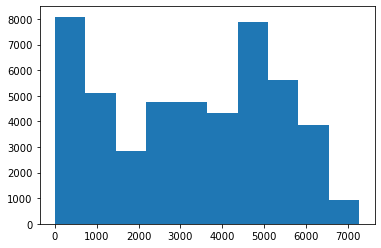

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [4]:
# plot histogram to examine distribution of traffic volume

plt.hist(traffic["traffic_volume"])
plt.show()

traffic["traffic_volume"].describe()

In [5]:
# change column datatype to datatime 

traffic['date_time'] = pd.to_datetime(traffic['date_time'])

### 3. Daytime and nighttime traffic

##### About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.

##### About 25% of the time, the traffic volume was four times as much (4,933 cars or more). There is a possibility that nighttime and daytime might influence traffic volume.

##### We'll divide the dataset into two parts:

###### * Daytime sataset: hours from 7 a.m. to 7 p.m. (12 hours)

###### *Nighttime dataset: hours from 7 p.m. to 7 a.m. (12 hours)

##### While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [6]:
# split data into daytime and nighttime

traffic_day = traffic.loc[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
traffic_night = traffic.loc[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]

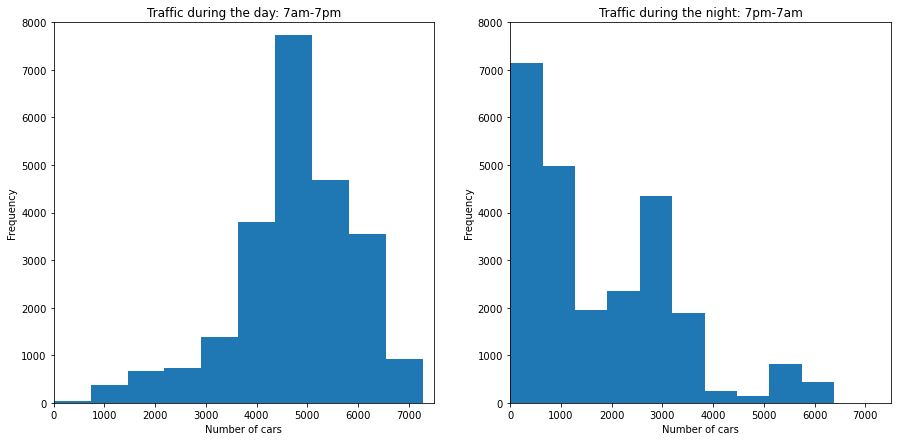

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [7]:
# use figure to plot two histograms to visually analyze the traffic volume during daytime and nighttime
plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
plt.hist(traffic_day["traffic_volume"])
plt.title("Traffic during the day: 7am-7pm")
plt.xlim([0,7500])
plt.ylim([0,8000])
plt.ylabel('Frequency')
plt.xlabel('Number of cars')

plt.subplot(1, 2, 2)
plt.xlim([0,7500])
plt.ylim([0,8000])
plt.title("Traffic during the night: 7pm-7am")
plt.hist(traffic_night["traffic_volume"])
plt.ylabel('Frequency')
plt.xlabel('Number of cars')
plt.show()

traffic_day["traffic_volume"].describe()

In [8]:
traffic_night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

##### As our goal is to find indicators of heavy traffic, we will only focus on the daytime data moving forward.

### 4. Traffic during certain day and hour 

##### One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# add new column for month
traffic_day['month'] = traffic_day['date_time'].dt.month
traffic_day.head(3)

<ipython-input-9-cacade6e0997>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_day['month'] = traffic_day['date_time'].dt.month


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10


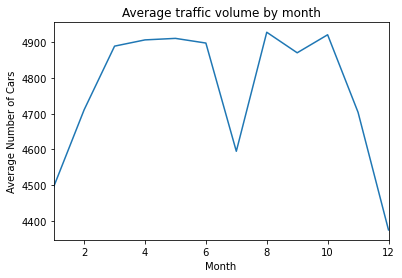

In [10]:
# group by month and extract mean of each column
by_month = traffic_day.groupby('month').mean()

#plot linear graph to visualize the monthly mean of traffic volume
plt.plot(by_month["traffic_volume"])
plt.title("Average traffic volume by month")
plt.xlim([1,12])
plt.xlabel('Month')
plt.ylabel('Average Number of Cars')
plt.show()

In [11]:
# add new column for day of the week
traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek
traffic_day.head(3)

<ipython-input-11-c952e9b1366e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1


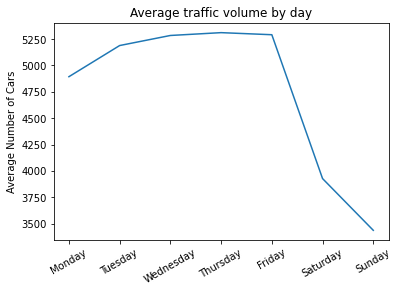

In [12]:
#group by day of the week and extract daily mean of traffic volume
by_dayofweek = traffic_day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] # 0 is Monday, 6 is Sunday

# plot linear graph to visualize the daily mean of traffic volume
plt.plot(by_dayofweek['traffic_volume'])
plt.title("Average traffic volume by day")
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=30)
plt.ylabel('Average Number of Cars')
plt.show()

##### The traffic volume is significantly heavier on business days compared to the weekends.

##### The traffic volume is significantly light from November to February. This means that the traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

### 5. Traffic during different time of the day

##### We'll will now look at the traffic at different time of the day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [13]:
# add new column for hour of the day
traffic_day['hour'] = traffic_day['date_time'].dt.hour
traffic_day.head(5)

<ipython-input-13-0680075e5bc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_day['hour'] = traffic_day['date_time'].dt.hour


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1,13


In [14]:
# extract business day and weekend data
traffic_day_bussiness = traffic_day.copy()[traffic_day['dayofweek'] <= 4]
traffic_day_weekend = traffic_day.copy()[traffic_day['dayofweek'] >= 5]

#group by day of the week and extract mean for business days
traffic_day_bussiness_byhour = traffic_day_bussiness.groupby('hour').mean()
traffic_day_bussiness_byhour["traffic_volume"]

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [15]:
#group by day of the week and extract mean for weekend
traffic_day_weekend_byhour = traffic_day_weekend.groupby('hour').mean()
traffic_day_weekend_byhour["traffic_volume"]

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

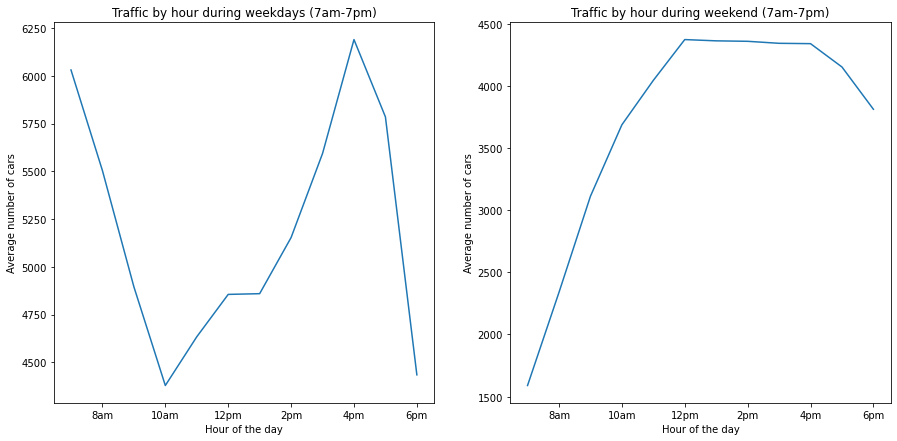

In [16]:
# plot linear graph to visualize the hourly mean of traffic volume

plt.figure(figsize=(15,7))

plt.subplot(1,2,1) # for business days
plt.plot(traffic_day_bussiness_byhour["traffic_volume"])
plt.title("Traffic by hour during weekdays (7am-7pm)")
plt.ylabel('Average number of cars')
plt.xlabel('Hour of the day')
plt.xticks(ticks=[8,10,12,14,16,18], labels=["8am","10am","12pm","2pm","4pm","6pm"])

plt.subplot(1,2,2) # for weekends
plt.plot(traffic_day_weekend_byhour["traffic_volume"])
plt.title("Traffic by hour during weekend (7am-7pm)")
plt.ylabel('Average number of cars')
plt.xlabel('Hour of the day')
plt.xticks(ticks=[8,10,12,14,16,18], labels=["8am","10am","12pm","2pm","4pm","6pm"])
plt.show()

##### The traffic is usually heavier on business days compared to weekends. On business days, the rush hours are around the 7th and 16th hour.

### 6. Correlation 

##### Correlation values between traffic_volume and the numerical weather columns.

In [17]:
traffic_day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

##### There does not seem to be any significant correlations for the above columns. 

##### We will look at the 2 nonnumeric columns: weather_main and weather_description.

In [18]:
# group by weather_main and calculate the mean
traffic_day_by_weather_main = traffic_day.groupby('weather_main').mean()

# group by weather_description and calculate the mean
traffic_day_by_weather_description = traffic_day.groupby('weather_description').mean()

traffic_day_by_weather_main["traffic_volume"]

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64

In [19]:
traffic_day_by_weather_description["traffic_volume"]

weather_description
SQUALLS                                4211.000000
Sky is Clear                           4919.009390
broken clouds                          4824.130326
drizzle                                4737.330935
few clouds                             4839.818023
fog                                    4372.491713
freezing rain                          4314.000000
haze                                   4609.893285
heavy intensity drizzle                4738.586207
heavy intensity rain                   4610.356164
heavy snow                             4411.681250
light intensity drizzle                4890.164049
light intensity shower rain            4558.100000
light rain                             4859.650849
light rain and snow                    5579.750000
light shower snow                      4618.636364
light snow                             4430.858896
mist                                   4623.976475
moderate rain                          4769.643312
overcast cl

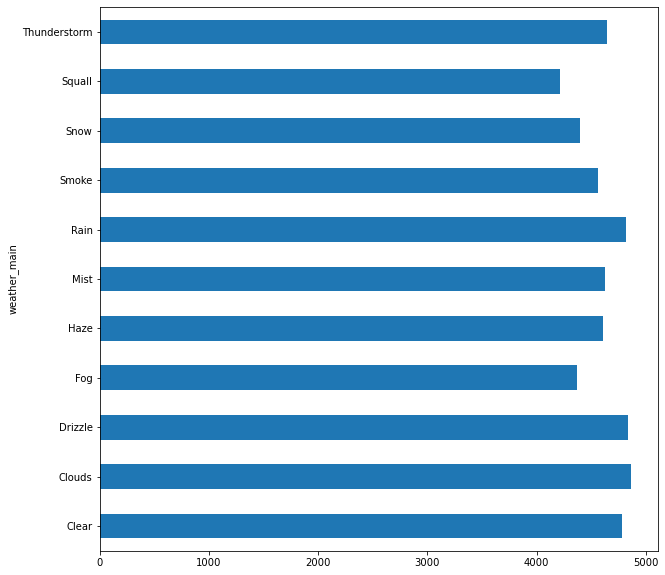

In [20]:
# plot horizontal bar to visualize the mean 
traffic_day_by_weather_main["traffic_volume"].plot.barh(figsize=(10,10))
plt.show()

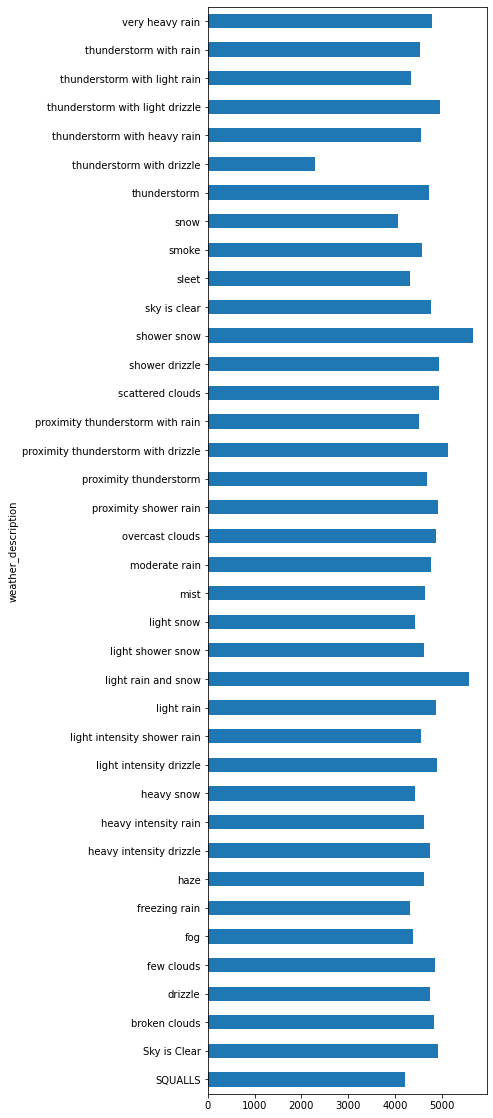

In [21]:
# plot horizontal bar to visualize the mean
traffic_day_by_weather_description["traffic_volume"].plot.barh(figsize=(5,20))
plt.show()

### 7. Conclusion

##### In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

##### Time indicators: 
##### The traffic is usually heavier during warm months (March–October) compared to cold months (November–February). The traffic is usually heavier on business days compared to the weekends. On business days, the rush hours are around 7 and 16.

##### Weather indicators: 
##### The traffic is usually heavier during shower snow, light rain and snow and proximity thunderstorm with drizzle.

